<h1>Enhancing Fashion Retail with AI: A Comprehensive Product Analysis System</h1>

<h2>Project Overview:</h2>
<p>
    The project aims to develop an intelligent system that analyzes various aspects of fashion products based on a rich dataset.
    By employing machine learning techniques, the system provides in-depth insights into products, helping both consumers and
    retailers make informed decisions. The dataset encompasses diverse attributes, including product titles, customer reviews,
    ratings, cons ratings, cloth class, materials, construction methods, color, finishing, and durability metrics.
</p>

<h2>Project Components:</h2>
<ul>
    <li><strong>Data Collection:</strong> Gather a diverse dataset from fashion retail sources...</li>
    <li><strong>Data Cleaning and Preprocessing:</strong> Clean the dataset to handle missing values, outliers, and inconsistencies...</li>
    <li><strong>Feature Engineering:</strong> Extract relevant features from textual data, such as sentiment scores from reviews...</li>
    <li><strong>Machine Learning Models:</strong> Implement various machine learning models to predict product attributes or customer behavior...</li>
    <li><strong>Model Evaluation and Optimization:</strong> Evaluate models using appropriate metrics, such as Mean Squared Error for regression tasks...</li>
    <li><strong>Interactive User Interface:</strong> Develop a user-friendly interface where users can input product details or preferences...</li>
    <li><strong>Business Insights and Decision Making:</strong> Provide actionable insights to retailers...</li>
    <li><strong>Continuous Learning and Feedback Loop:</strong> Implement mechanisms to collect user feedback on product recommendations...</li>
</ul>

<h2>Benefits:</h2>
<ul>
    <li><strong>Enhanced Customer Experience:</strong> Customers receive personalized product recommendations and can make well-informed purchase decisions...</li>
    <li><strong>Retail Optimization:</strong> Retailers gain insights into customer preferences, enabling them to optimize inventory...</li>
    <li><strong>Data-Driven Decision Making:</strong> The project promotes data-driven decision-making in the fashion retail industry...</li>
</ul>

In [67]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import warnings
import math
from colorama import Style, Fore
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud

In [68]:
warnings.filterwarnings("ignore")

In [69]:
rc = {
    "axes.facecolor": "#E6FFE6",
    "figure.facecolor": "#E6FFE6",
    "axes.edgecolor": "#000000",
    "grid.color": "#EBEBE7",
    "font.family": "serif",
    "axes.labelcolor": "#000000",
    "xtick.color": "#000000",
    "ytick.color": "#000000",
    "grid.alpha": 0.4
}

sns.set(rc=rc)

In [70]:
red = Style.BRIGHT + Fore.RED
blu = Style.BRIGHT + Fore.BLUE
mgt = Style.BRIGHT + Fore.MAGENTA
gld = Style.BRIGHT + Fore.YELLOW
res = Style.RESET_ALL

In [71]:
# Read Data

df = pd.read_csv('./dataset/dataset_amazon_customer_reviews.csv')
df.head()

,Title,Review,Cons_rating,Cloth_class,Materials,Construction,Color,Finishing,Durability
0,NaN,Absolutely wonderful - silky and sexy and comf...,4.0,Intimates,0.0,0.0,0.0,1.0,0.0
1,NaN,Love this dress! it's sooo pretty. i happene...,5.0,Dresses,0.0,1.0,0.0,0.0,0.0
2,Some major design flaws,I had such high hopes for this dress and reall...,3.0,Dresses,0.0,0.0,0.0,1.0,0.0
3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5.0,Pants,0.0,0.0,0.0,0.0,0.0
4,Flattering shirt,This shirt is very flattering to all due to th...,5.0,Blouses,0.0,1.0,0.0,0.0,0.0


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49338 entries, 0 to 49337
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         45370 non-null  object 
 1   Review        48507 non-null  object 
 2   Cons_rating   49124 non-null  float64
 3   Cloth_class   49322 non-null  object 
 4   Materials     5741 non-null   float64
 5   Construction  5743 non-null   float64
 6   Color         5742 non-null   float64
 7   Finishing     5737 non-null   float64
 8   Durability    5734 non-null   float64
dtypes: float64(6), object(3)
memory usage: 3.4+ MB


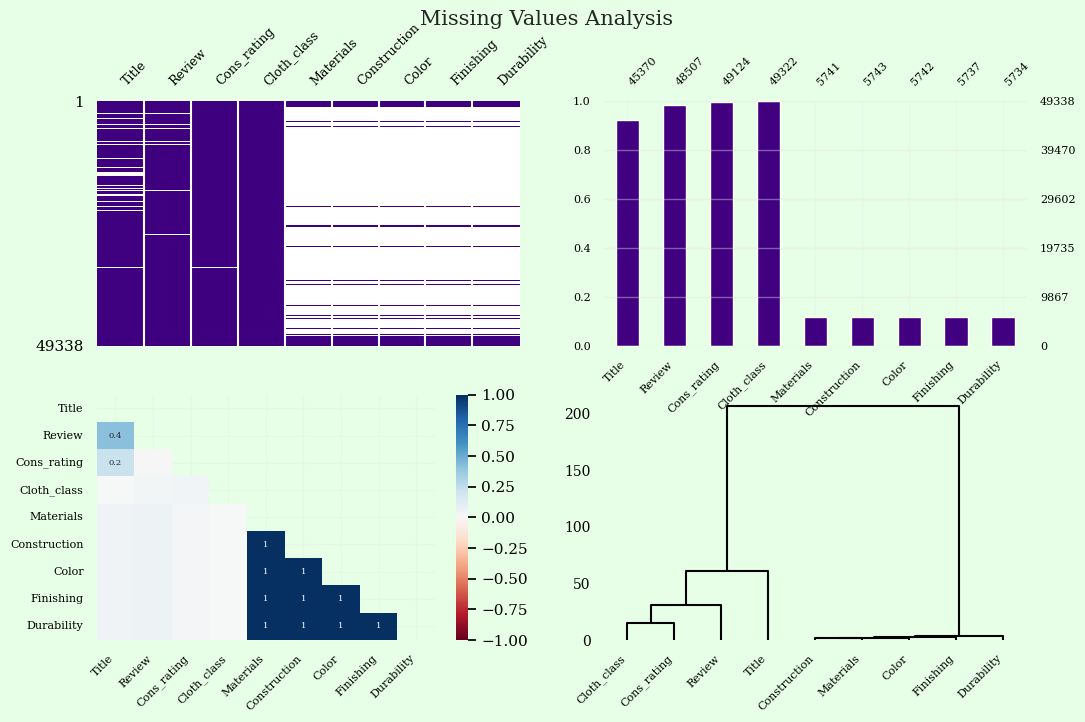

In [73]:
fig, ax = plt.subplots(2,2,figsize=(12,7))
axs = np.ravel(ax)
msno.matrix(df,  fontsize=9, color=(0.25,0,0.5),ax=axs[0])
msno.bar(df, fontsize=8, color=(0.25,0,0.5), ax=axs[1])
msno.heatmap(df,fontsize=8,ax=axs[2])
msno.dendrogram(df,fontsize=8,ax=axs[3], orientation='top')

fig.suptitle('Missing Values Analysis', y=1.01, fontsize=15)

# Save the plot
plt.savefig('missing_values_analysis.png')

# Show the plot
plt.show()

In [74]:
df.fillna(0, inplace=True)

In [75]:
df = df.drop_duplicates()

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48217 entries, 0 to 49337
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         48217 non-null  object 
 1   Review        48217 non-null  object 
 2   Cons_rating   48217 non-null  float64
 3   Cloth_class   48217 non-null  object 
 4   Materials     48217 non-null  float64
 5   Construction  48217 non-null  float64
 6   Color         48217 non-null  float64
 7   Finishing     48217 non-null  float64
 8   Durability    48217 non-null  float64
dtypes: float64(6), object(3)
memory usage: 3.7+ MB


In [77]:
df.describe()

,Cons_rating,Materials,Construction,Color,Finishing,Durability
count,48217.000000,48217.000000,48217.000000,48217.000000,48217.000000,48217.000000
mean,4.075036,0.036502,0.060041,0.030943,0.031628,0.025323
std,1.312634,0.191477,0.237653,0.177426,0.175009,0.161789
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,9.000000,2.000000,9.000000,1.000000,9.000000


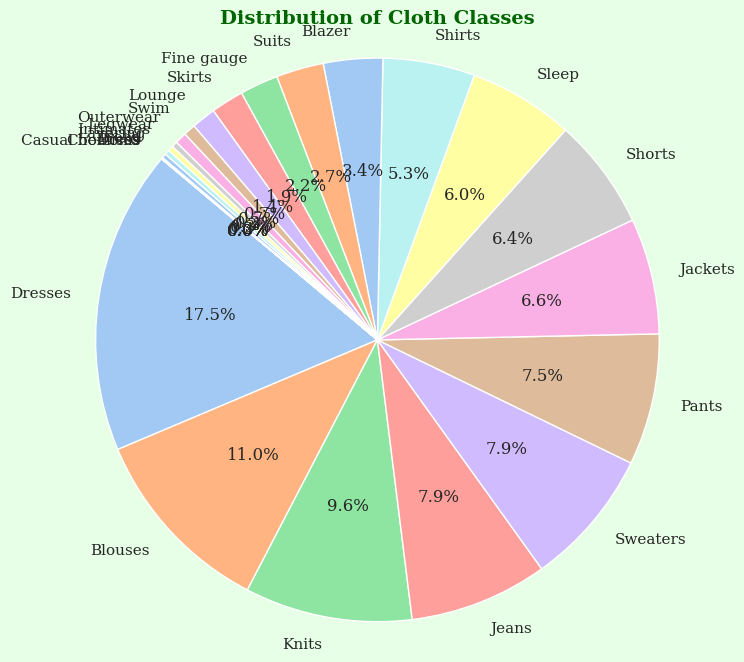

In [78]:
# Calculate the frequency of each cloth class
cloth_class_counts = df['Cloth_class'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(cloth_class_counts, labels=cloth_class_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Distribution of Cloth Classes', fontsize = 14, fontweight = 'bold', color = 'darkgreen')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.savefig('Distribution of Cloth Classes.png')
plt.show()

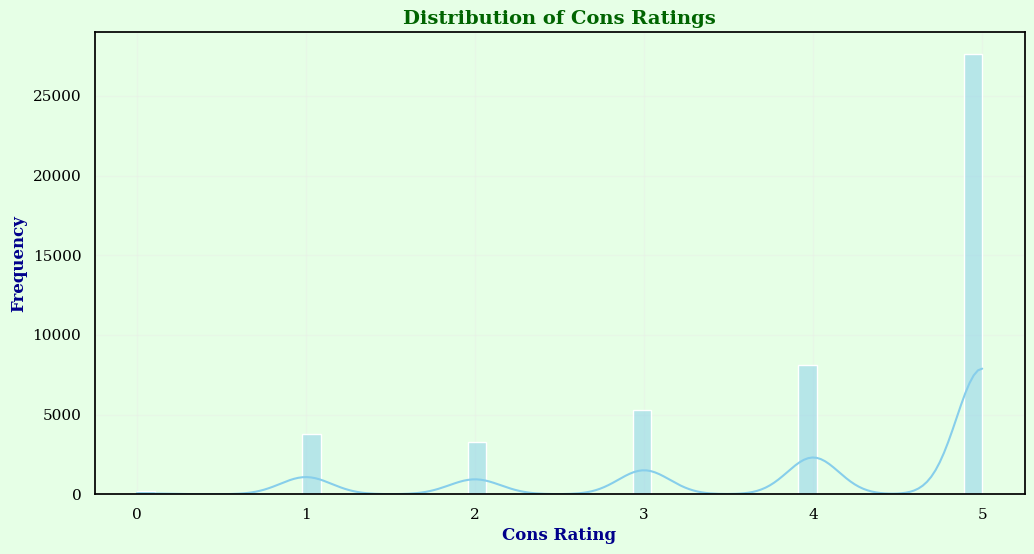

In [79]:
# Distribution of Cons Ratings
plt.figure(figsize=(12, 6))
sns.histplot(df['Cons_rating'], kde=True, color='skyblue')
plt.title('Distribution of Cons Ratings', fontsize = 14, fontweight = 'bold', color = 'darkgreen')
plt.xlabel('Cons Rating', fontsize = 12, fontweight = 'bold', color = 'darkblue')
plt.ylabel('Frequency', fontsize = 12, fontweight = 'bold', color = 'darkblue')
plt.savefig('Distribution of Con Ratings.png')
plt.show()

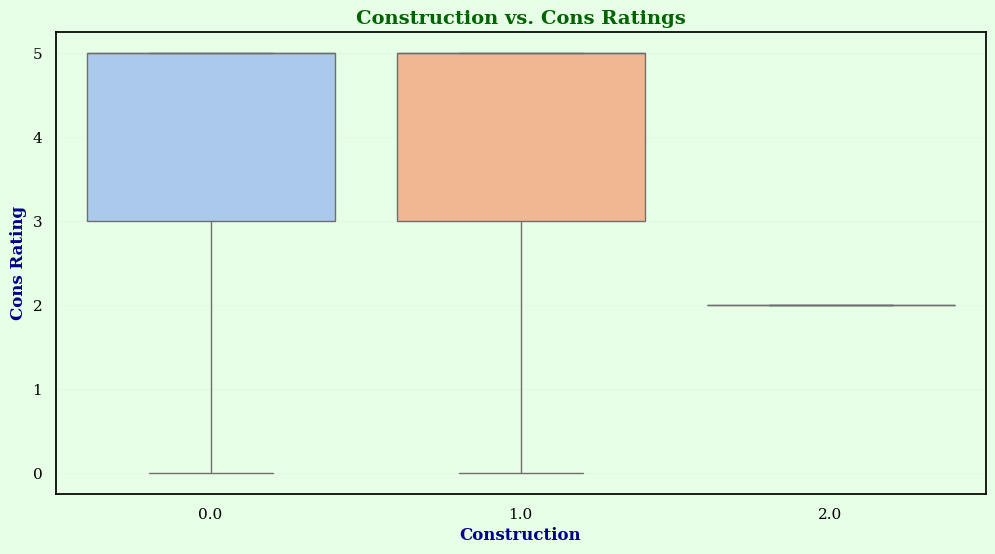

In [80]:
# Construction vs. Cons Ratings
plt.figure(figsize=(12, 6))
sns.boxplot(x='Construction', y='Cons_rating', data=df, palette='pastel')
plt.title('Construction vs. Cons Ratings', fontsize = 14, fontweight = 'bold', color = 'darkgreen')
plt.xlabel('Construction', fontsize = 12, fontweight = 'bold', color = 'darkblue')
plt.ylabel('Cons Rating', fontsize = 12, fontweight = 'bold', color = 'darkblue')
plt.savefig('Construction vs. Cons Ratings.png')
plt.show()



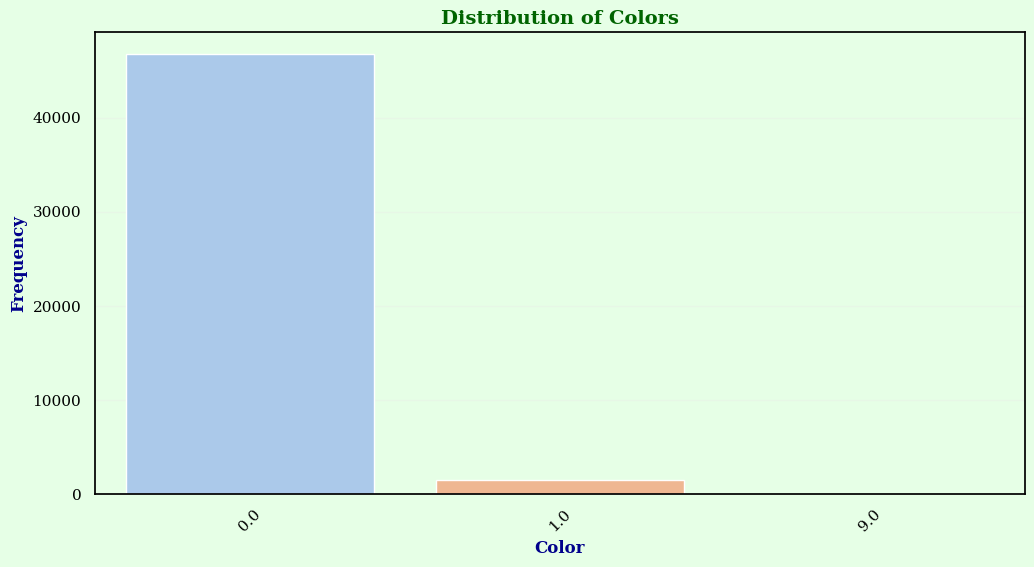

In [81]:
# Color Distribution
plt.figure(figsize=(12, 6))
sns.countplot(x='Color', data=df, palette='pastel')
plt.title('Distribution of Colors', fontsize = 14, fontweight = 'bold', color = 'darkgreen')
plt.xlabel('Color', fontsize = 12, fontweight = 'bold', color = 'darkblue')
plt.ylabel('Frequency', fontsize = 12, fontweight = 'bold', color = 'darkblue')
plt.xticks(rotation=45)
plt.savefig('Distribution of Colors.png')
plt.show()

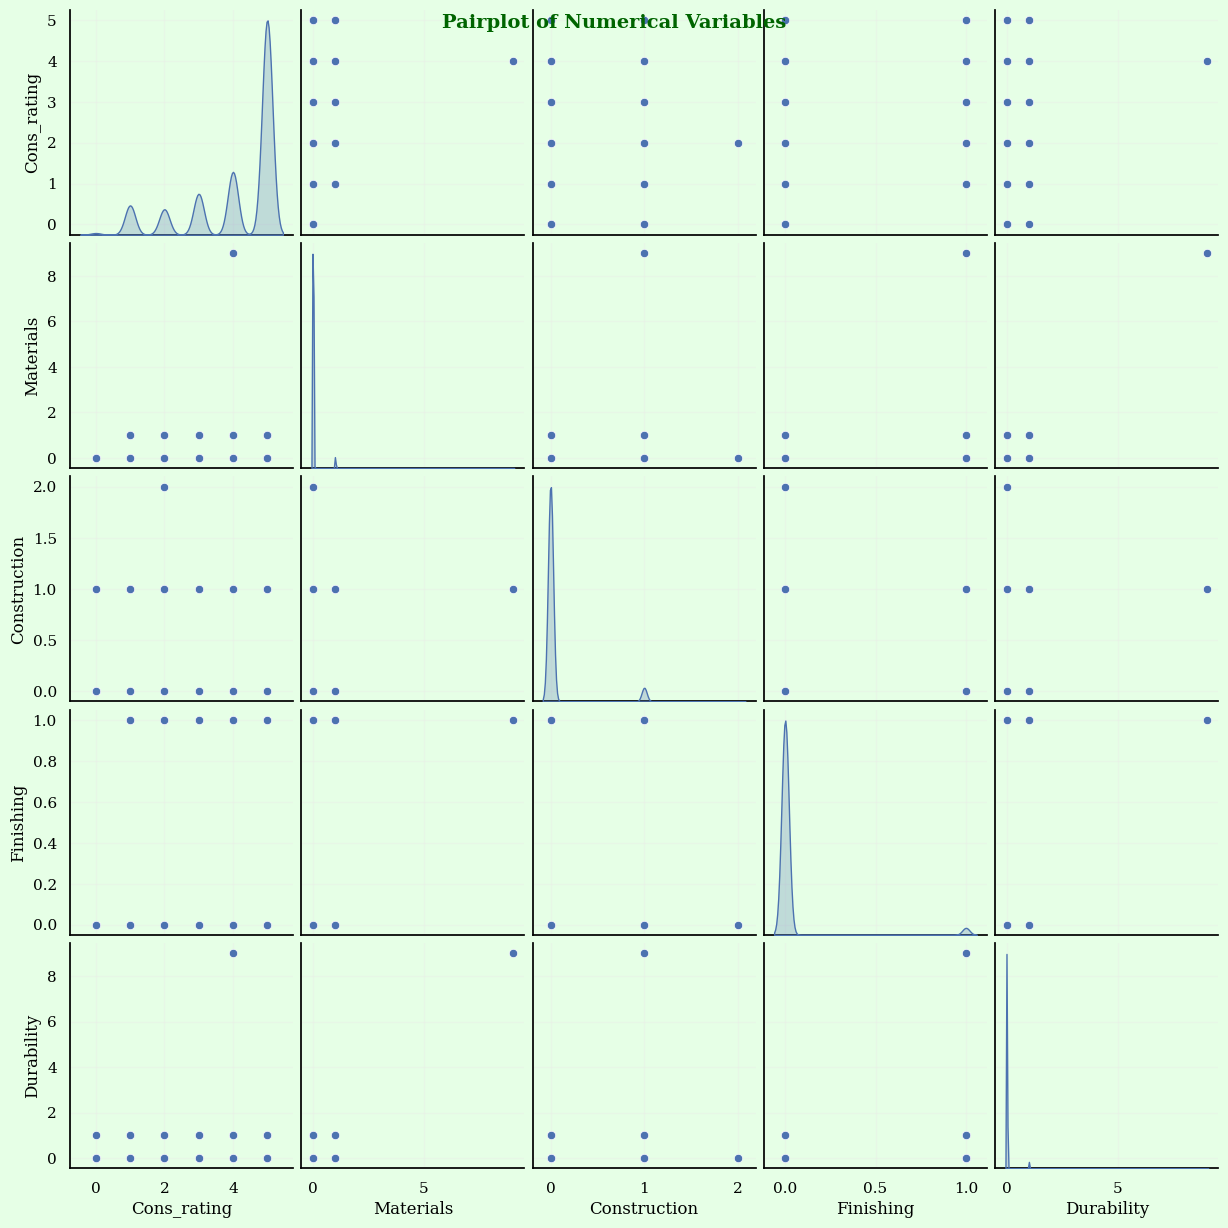

In [82]:
# Pairplot of Numerical Variables
sns.pairplot(df[['Cons_rating', 'Materials', 'Construction', 'Finishing', 'Durability']], diag_kind='kde')
plt.suptitle('Pairplot of Numerical Variables', fontsize = 14, fontweight = 'bold', color = 'darkgreen')
plt.savefig('Pairplot of Numerical Variables.png')
plt.show()

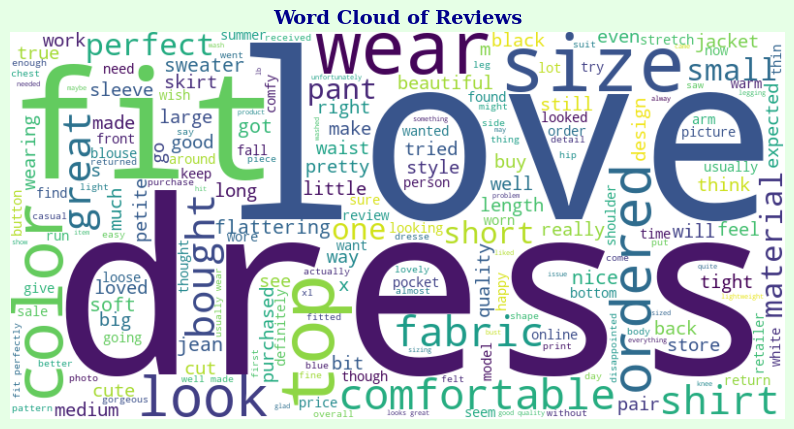

In [83]:
# Convert 'Review' column to string type
df['Review'] = df['Review'].astype(str)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['Review']))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Reviews', fontsize = 14, fontweight = 'bold', color = 'darkblue')
plt.axis('off')
plt.savefig('Word Cloud of Reviews.png')
plt.show()



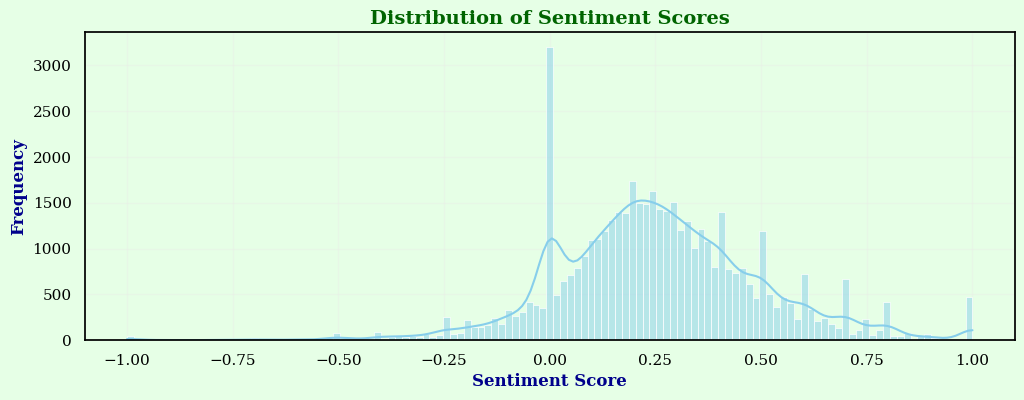

In [84]:
# Sentiment Analysis
# We'll use the TextBlob library for sentiment analysis
from textblob import TextBlob

df['Sentiment'] = df['Review'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Plotting Sentiment Distribution
plt.figure(figsize=(12, 4))
sns.histplot(df['Sentiment'], kde=True, color='skyblue')
plt.title('Distribution of Sentiment Scores', fontsize = 14, fontweight = 'bold', color = 'darkgreen')
plt.xlabel('Sentiment Score', fontsize = 12, fontweight = 'bold', color = 'darkblue')
plt.ylabel('Frequency', fontsize = 12, fontweight = 'bold', color = 'darkblue')
plt.savefig('Distribution of Sentiment Scores.png')
plt.show()



In [85]:
# Categorical Analysis
categorical_counts = df['Cloth_class'].value_counts()

print("\nCategorical Analysis:")
print(categorical_counts)


Categorical Analysis:
Cloth_class
Dresses           8422
Blouses           5309
Knits             4631
Jeans             3827
Sweaters          3808
Pants             3634
Jackets           3205
Shorts            3075
Sleep             2916
Shirts            2543
Blazer            1638
Suits             1313
Fine gauge        1062
Skirts             906
Lounge             672
Swim               332
Outerwear          321
Legwear            159
Intimates          150
Layering           135
Trend              119
Dress               22
0                   15
Casual bottoms       2
Chemises             1
Name: count, dtype: int64


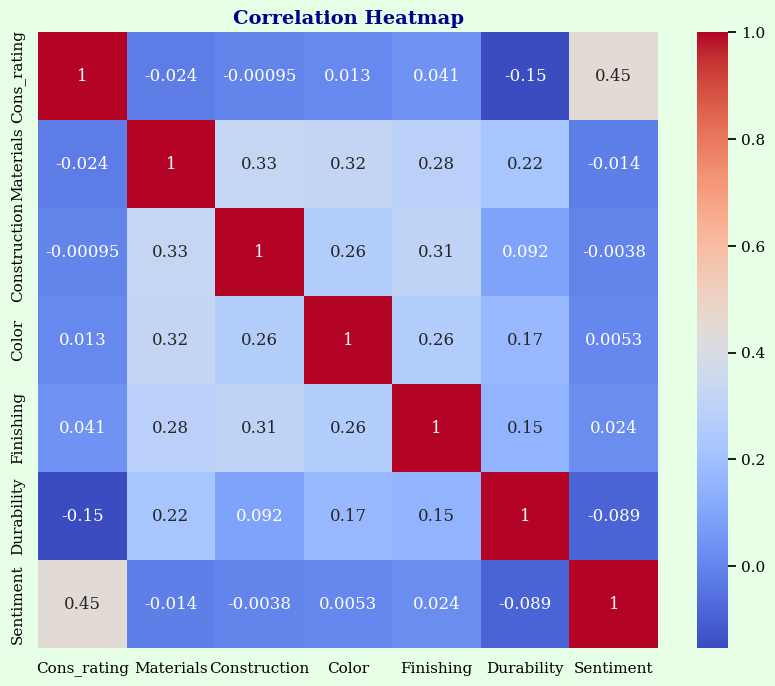

In [86]:
# Drop non-numeric columns
df_numeric = df.drop(columns=['Title', 'Review', 'Cloth_class'])

# Calculate the correlation matrix
correlation_matrix = df_numeric.corr()

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap", fontsize = 14, fontweight = 'bold', color = 'darkblue')
plt.savefig('Correlation Heatmap.png')
plt.show()

In [87]:
# Feature Importance Analysis
# For simplicity, we'll use a Random Forest Regressor
X = df.drop(columns=['Cons_rating', 'Title', 'Review', 'Cloth_class'])
y = df['Cons_rating']
model = RandomForestRegressor()
model.fit(X, y)
feature_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

print("\nFeature Importance:")
print(feature_importance)


Feature Importance:
Sentiment       0.913038
Durability      0.024522
Construction    0.020988
Materials       0.014561
Color           0.013886
Finishing       0.013004
dtype: float64


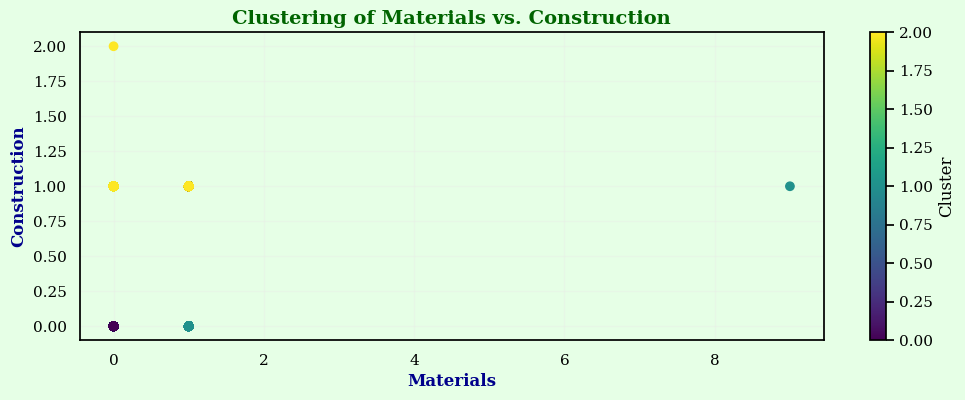

Cluster Counts:
Cluster
0    44005
2     2834
1     1378
Name: count, dtype: int64


In [88]:
# Clustering
from sklearn.cluster import KMeans

X_cluster = df[['Materials', 'Construction', 'Color', 'Finishing', 'Durability']]
kmeans = KMeans(n_clusters=3, random_state=0).fit(X_cluster)
df['Cluster'] = kmeans.labels_

# Scatter plot with labels
plt.figure(figsize=(12, 4))
plt.scatter(X_cluster['Materials'], X_cluster['Construction'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Materials', fontsize = 12, fontweight = 'bold', color = 'darkblue')
plt.ylabel('Construction', fontsize = 12, fontweight = 'bold', color = 'darkblue')
plt.title('Clustering of Materials vs. Construction', fontsize = 14, fontweight = 'bold', color = 'darkgreen')
plt.colorbar(label='Cluster')
plt.savefig('Clustering of Materials vs. Construction.png')
plt.show()

# Print result values
cluster_counts = df['Cluster'].value_counts()
print("Cluster Counts:")
print(cluster_counts)

In [89]:
# NLP (Topic Modeling)
from sklearn.decomposition import LatentDirichletAllocation

vectorizer = CountVectorizer(max_features=1000, stop_words='english')
X_nlp = vectorizer.fit_transform(df['Review'])
lda = LatentDirichletAllocation(n_components=5, random_state=0)
topics = lda.fit_transform(X_nlp)

# Get the top words for each topic
feature_names = vectorizer.get_feature_names_out()
top_words = []

for topic_idx, topic in enumerate(lda.components_):
    top_words_idx = topic.argsort()[:-10-1:-1]
    top_words.append([feature_names[i] for i in top_words_idx])

# Print out the top words for each topic
for i, words in enumerate(top_words):
    print(f"Topic {i+1}:")
    print(", ".join(words))

Topic 1:
dress, size, small, like, just, love, fabric, fit, large, ordered
Topic 2:
color, sweater, good, jacket, like, great, shirt, quality, nice, fit
Topic 3:
fit, like, size, pants, just, waist, ordered, quality, don, good
Topic 4:
love, comfortable, dress, great, wear, jeans, perfect, soft, fit, flattering
Topic 5:
size, fit, perfect, fits, great, wear, perfectly, bought, long, comfortable


In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Model Training
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=0)
model.fit(X_train, y_train)

# Model Evaluation
from sklearn.metrics import classification_report, accuracy_score

y_pred = model.predict(X_test)

# Print classification report and accuracy
print("Classification Report:")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")

Classification Report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        35
         1.0       0.34      0.27      0.30       758
         2.0       0.16      0.10      0.12       640
         3.0       0.15      0.09      0.11      1021
         4.0       0.23      0.14      0.17      1633
         5.0       0.65      0.82      0.73      5557

    accuracy                           0.53      9644
   macro avg       0.25      0.24      0.24      9644
weighted avg       0.47      0.53      0.49      9644

Accuracy: 53.41%
